In [147]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler,OrdinalEncoder
from sklearn import set_config
set_config(transform_output='pandas')
pd.set_option('display.max_columns',100)
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [148]:
df = pd.read_csv('credit_card.csv')

df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [149]:
scaler=  StandardScaler()
df_scaler=scaler.fit_transform(df)

# Kmeans 

In [150]:
#Fit a KMeans model to create 3 clusters.  Please use a random state of 42 for your model.

Kmeans= KMeans(n_clusters=3,random_state=42,n_init=10)
Kmeans.fit(df_scaler)

KMeans(n_clusters=3, n_init=10, random_state=42)

In [151]:
#df['cluster'] = Kmeans.predict(df)

In [152]:
#Use scipy.spatial.distance.cdist to create a matrix of distances between each data point and each cluster center
cluster_ceners=pd.DataFrame(Kmeans.cluster_centers_, columns=df.columns)
from scipy.spatial.distance import cdist
# Calculate distance to each cluster center
distances = cdist(df_scaler,cluster_ceners)


In [153]:
# Saving distances as a dataframe for convenience
cluter_cols = [f"Distance (Cluster {c})" for  c in range(len(Kmeans.cluster_centers_))]
distance_df = pd.DataFrame(distances, columns = cluter_cols)
distance_df.head()


,Distance (Cluster 0),Distance (Cluster 1),Distance (Cluster 2)
0,2.804682,4.393264,5.857215
1,2.426430,3.686087,5.075081
2,6.542622,7.337378,8.656002
3,4.742521,5.673966,6.854577
4,3.249731,4.478735,6.104439


In [154]:
min_destance = np.min(distance_df, axis=1)
threshold  = np.percentile(min_destance,99.6 )
threshold 

20.909887868001256

In [155]:
filter  =  min_destance>threshold 
filter.sum()

40

In [166]:
idx_anomalies= df[filter].index

# Isolation Forest:

In [156]:
isf = IsolationForest(contamination= 0.004, random_state=42 )
isf.fit(df_scaler.values)

IsolationForest(contamination=0.004, random_state=42)

In [185]:
isf_predict = isf.predict(df_scaler.values)
isf_predict[:1000]

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [186]:
isf_predict[isf_predict== 1]= 0
isf_predict[isf_predict== -1 ] = 1 

In [187]:
isf_predict[:1000]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [189]:
isf_df =isf_predict== 1 

In [192]:
idx_isf =df[isf_df].index


In [199]:
pca= PCA(n_components=2 , random_state=42)
pca_kmeans= pca.fit_transform(df_scaler)

In [200]:
pca_kmeans

,pca0,pca1
0,2.240784,-0.951834
1,1.398821,0.562988
2,2.380034,-1.571019
3,1.784756,-0.489302
4,1.903234,-0.970879
...,...,...
9995,-0.598207,-0.072102
9996,-0.650396,0.390154
9997,-1.658410,-1.487060
9998,-0.583799,-0.038935


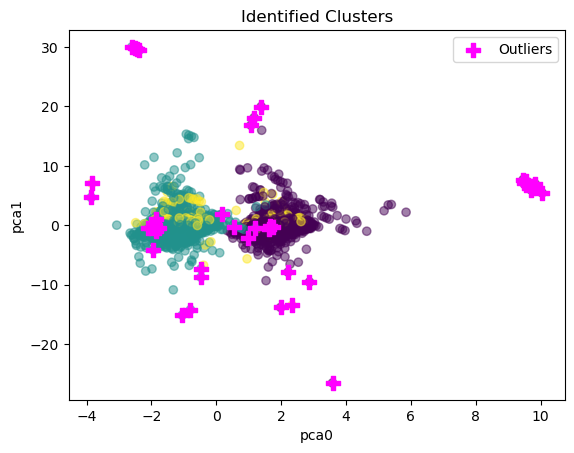

In [216]:
fig, ax = plt.subplots()
ax.scatter(pca_kmeans['pca0'], pca_kmeans['pca1'], c=Kmeans.labels_, alpha=0.5)
ax.set(title="Identified Clusters")
pca_kmeans.iloc[idx_anomalies].plot(
    x="pca0", y="pca1", kind="scatter", color="magenta", label="Outliers", ax=ax, marker='P',s=100,
);

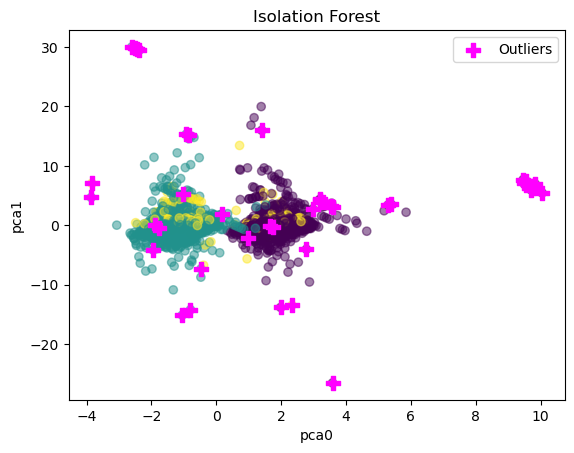

In [218]:
fig, ax = plt.subplots()
ax.scatter(pca_kmeans['pca0'], pca_kmeans['pca1'], c=Kmeans.labels_, alpha=0.5)
ax.set(title="Isolation Forest")
pca_kmeans.iloc[idx_isf].plot(
    x="pca0", y="pca1", kind="scatter", color="magenta", label="Outliers", ax=ax, marker='P',s=100,
);

In [238]:
# Make a list of anomolies identified in both methods
both = [a for a in idx_isf if a in idx_anomalies]

both_anomails= pd.Series(data=both)
both_anomails

0      159
1     1619
2     2156
3     2756
4     2914
5     2917
6     2923
7     5303
8     5412
9     5413
10    5704
11    6489
12    6643
13    6672
14    7338
15    7470
16    7596
17    7597
18    8124
19    8163
20    8437
21    8442
22    8856
23    8999
24    9071
25    9304
26    9326
dtype: int64

Answer the following:
a. How many anomalies did the two approaches agree on?
  * 40 

b. What percentage of the anomalies did the two approaches agree on?
   * 13 
